In [6]:
# STEP 1: Install required packages
!pip install shap



In [7]:
# STEP 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
# STEP 3: Upload dataset
from google.colab import files
uploaded = files.upload()  # Upload your hr_data.csv file

# STEP 4: Read dataset
df = pd.read_csv("hr_data.csv")  # Replace with your actual filename
df.head()


Saving hr_data.csv to hr_data (2).csv


,EmployeeID,Department,Salary,PromotionLast5Years,YearsAtCompany,Age,Attrition
0,1,Sales,35000,0,1,25,0
1,2,HR,40000,1,2,30,1
2,3,R&D,45000,0,3,35,0
3,4,IT,50000,1,4,40,1
4,5,Finance,55000,0,5,45,0


In [9]:
# STEP 5: Basic info and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           100 non-null    int64 
 1   Department           100 non-null    object
 2   Salary               100 non-null    int64 
 3   PromotionLast5Years  100 non-null    int64 
 4   YearsAtCompany       100 non-null    int64 
 5   Age                  100 non-null    int64 
 6   Attrition            100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB
None
EmployeeID             0
Department             0
Salary                 0
PromotionLast5Years    0
YearsAtCompany         0
Age                    0
Attrition              0
dtype: int64


In [10]:
# STEP 6: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

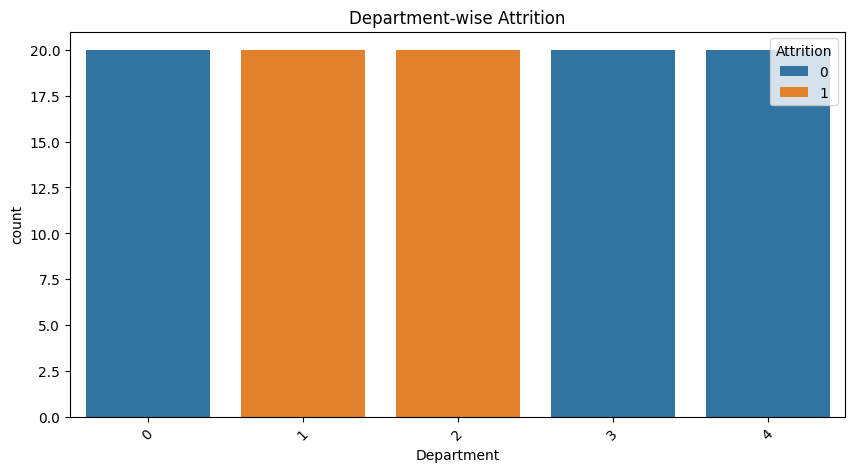

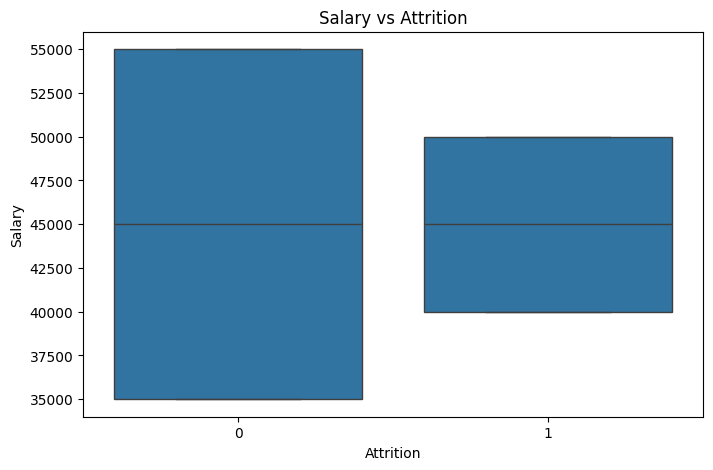

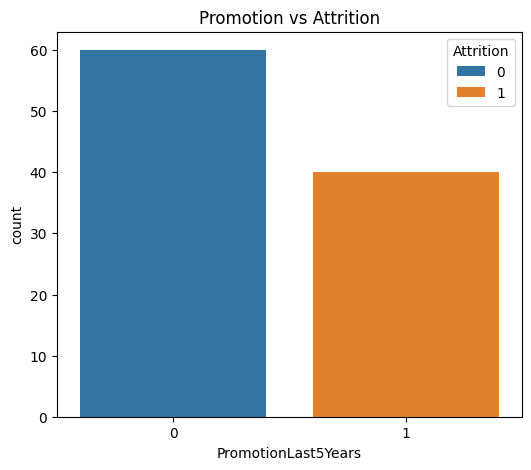

In [11]:
# STEP 7: EDA
plt.figure(figsize=(10,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Department-wise Attrition')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='Salary', data=df)
plt.title('Salary vs Attrition')
plt.show()

plt.figure(figsize=(6,5))
sns.countplot(x='PromotionLast5Years', hue='Attrition', data=df)
plt.title('Promotion vs Attrition')
plt.show()

In [12]:
# STEP 8: Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [13]:
# STEP 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# STEP 10: Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [16]:
# STEP 11: Decision Tree Model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [17]:
# STEP 12: Model Performance
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Logistic Regression Accuracy: 1.0
[[13  0]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Decision Tree Accuracy: 1.0
[[13  0]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [18]:
# STEP 13: SHAP Analysis
explainer = shap.Explainer(tree_model, X_train)
shap_values = explainer(X_test)

In [22]:
import shap

# Use TreeExplainer for tree-based models
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_test)

# For binary classification, shap_values is a list with 2 arrays (for class 0 and class 1)
# Use class 1 (usually 'Attrition = Yes') for interpretability
shap.plots.waterfall(shap.Explanation(values=shap_values[1][0],
                                      base_values=explainer.expected_value[1],
                                      data=X_test.iloc[0],
                                      feature_names=X_test.columns.tolist()))


In [24]:
import shap

# Use TreeExplainer for decision tree model
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_test)

# Create Explanation object for the first sample and class 1 (Attrition = Yes)
explanation = shap.Explanation(
    values=shap_values[1][0],
    base_values=explainer.expected_value[1],
    data=X_test.iloc[0],
    feature_names=X_test.columns.tolist()
)

# Waterfall plot
shap.plots.waterfall(explanation)


In [26]:
import matplotlib.pyplot as plt


In [27]:
plt.show()


In [28]:
import shap
import matplotlib.pyplot as plt

# TreeExplainer for decision tree model
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_test)

# Create Explanation object
explanation = shap.Explanation(
    values=shap_values[1][0],
    base_values=explainer.expected_value[1],
    data=X_test.iloc[0],
    feature_names=X_test.columns.tolist()
)

# Plot and display
shap.plots.waterfall(explanation)
plt.show()


<Figure size 640x480 with 0 Axes>

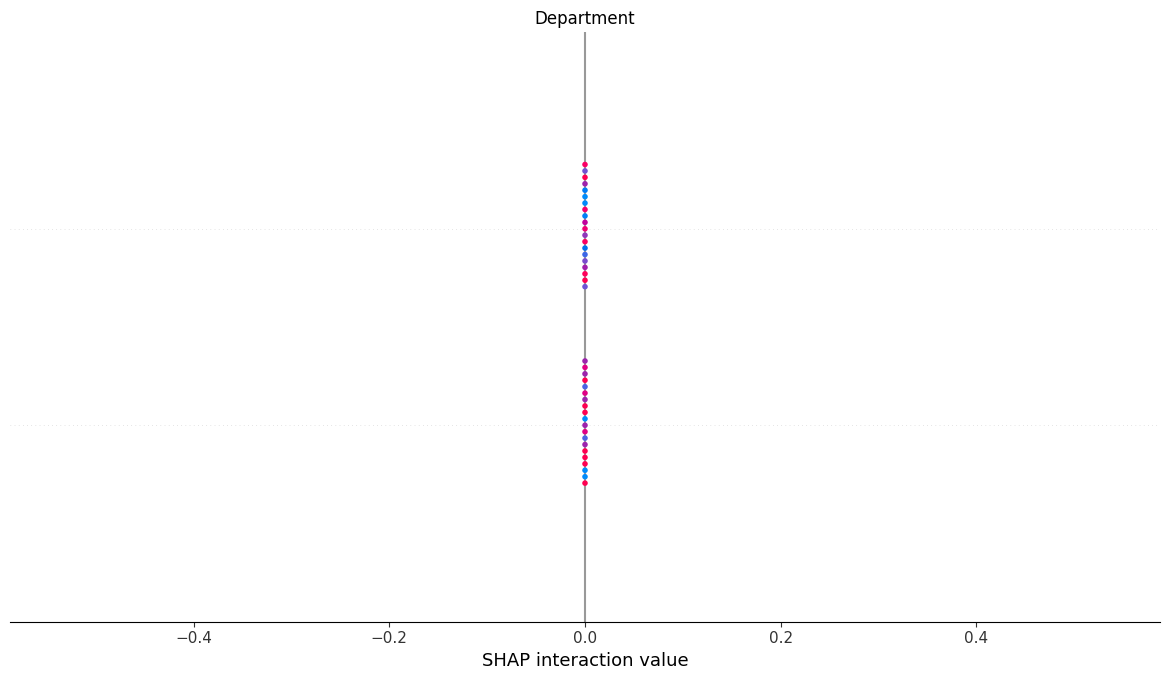

In [29]:
# Summary Plot
shap.summary_plot(shap_values, X_test)
